# CHAPTER 4 신경망 학습

## 4-1 데이터에서 학습한다!

### 4-1-1 데이터 주도 학습

### 4-1-2 훈련 데이터와 시험 데이터

## 4-2 손실 함수

### 4-2-1 평균 제곱 오차

In [ ]:
import numpy as np
def mean_squred_error(y , t):
    return 0.5 * np.sum((y-t) ** 2)

### 4-2-2 교차 엔트로피 오차

In [ ]:
def cross_entropy_error(y , t):
    delta = 1e-7
    return np.sum(t * np.log(y + delta))

### 4-2-3 미니배치 학습

In [2]:
%cd /content/drive/MyDrive/AI/독학/밑시딥

/content/drive/MyDrive/AI/독학/밑시딥


In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥')
import numpy as np
from dataset.mnist import load_mnist

(x_train , t_train) , (x_test , t_test) = \
load_mnist(normalize = True , one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size , batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4-2-4 (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
# y가 출력 t가 정답 레이블 
def cross_entropy_error(y , t):
    if y.ndim == 1:
        t = t.reshape(1 , t.size)
        y = y.reshape(1 , y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
#원 핫 인코딩이 아닐때
def cross_entropy_error(y , t):
    if y.ndim == 1:
        t= t.reshape(1 , t.size)
        y= y.reshape(1 , y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size) , t] + 1e-7)) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

## 4-3 수치 미분

### 4-3-1 미분

In [ ]:
def numerical_diff(f ,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

### 4-3-2 수치 미분의 예

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

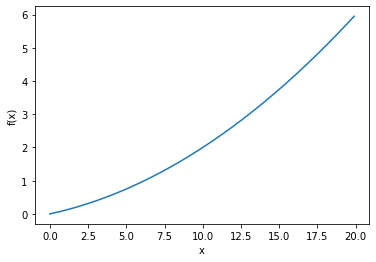

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0 , 20.0 , 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1 , 5)

0.1999999999990898

In [ ]:
numerical_diff(function_1 , 10)

0.2999999999986347

### 4-3-3 편미분

In [ ]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

## 4-4 기울기

In [ ]:
def numerical_gradient(f , x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

### 4-4-1 경사법(경사 하강법)

In [1]:
def gradient_descent(f , init_x , lr = 0.1  , step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f , x)
        x -= lr * grad
    return x

### 4-4-2 신경망에서의 기울기

In [6]:
%cd /content/drive/MyDrive/AI/독학/밑시딥

/content/drive/MyDrive/AI/독학/밑시딥


In [10]:
import sys, os
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥/common')
import numpy as np
from functions import softmax , cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__ (self):
        self.W = np.random.randn(2,3)

    def predict(self , x):
        return np.dot(x , self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y , t)

        return loss

## 4-5 학습 알고리즘 구현하기

In [13]:
import sys, os
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥/common')
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self , input_size , hidden_size , output_size , weight_init_std = 0.01 ):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size , hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size , output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self , x):
        W1 , W2 = self.params['W1'], self.params['W2']
        b1 , b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x , W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1 , W2) + b2
        y = softmax(a2)

        return y

    # x: 입력 데이터, t : 정답 데이터
    def loss(self, x , t):
        y = self.predict(x)

        return cross_entropy_error(y , t)

    def accuracy(self , x , t):
        y = self.predict(x)
        y = np.argmax(y , axis = 1)
        t = np.argmax(t , axis = 1)
        accuracy = np.sum(y == t) / float(x.shpae[0])
        return accuracy

    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self , x, t):
        loss_W = lambda W:self.loss(x , t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W , self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W , self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W , self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W , self.params['b2'])

        return grads
    

### 4-5-2 미니배치 학습 구현하기

In [ ]:
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥/dataset')
from mnist import load_mnist

(x_train , t_train) , (x_test , t_test) = load_mnist(normalize=True , one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 500
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784 , hidden_size = 50 , output_size = 10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    grad = network.numerical_gradient(x_batch , t_batch)

    #매개변수 갱신
    for key in ('W1' , 'b1' , 'W2' , 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch , t_batch)
    train_loss_list.append(loss)

### 4-5-3 시험 데이터로 평가하기

In [ ]:
import numpy as numpy
from mnist import load_mnist

(x_train , t_train), (x_test , t_test) = load_mnist(normalize = True , one_hot_label = True)

network = TwoLayerNet(input_size = 784 , hidden_size = 50 , output_size = 10)

# 하이퍼파라미터
iters_num = 500
train_size  = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size , 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산 
    grad = network.numeriacl_gradient(x_batch , t_batch)

    # 매개변수 갱신
    for key in ('W1' , 'b1' , 'W2' , 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch , t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train , t_train)
        test_acc = network.accuracy(x_test , t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ","  + str(test_acc))

